# Face Detection using Ring Doorbell Videos


## Choice of dataset: 
Dataset is a set of surveillance videos from my ring doorbell that have been downloaded in MP4 format. The videos will be converted to image sequences for processing.
![Example of Ring Video](screen-shot.png "Example Ring Video")



## Goal: 
The goal of the project is to detect faces in the video using pre-trained classifiers from openCV and then to segment and isolate those faces within the bounding box of the detected face. 


 
## Proposed techniques: 
Use of pre-trained classifiers from openCV for frontal, angled, and side view faces will be used to detect faces within the the image as well as their bounding boxes. An example of using a pre-trained openCV classifier within scikit-image can be found at: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_face_detection.html 
Once the bounding boxes have been identified, segmentation techniques will then be used to isolate the faces within the image and to save them to a folder of detected faces. A thresholded image will be used to isolate the detected face and covert remaining background to black.



## Resources/libraries: 

Two common classifiers are used for face detection in openCV
LBP cascade classifier
Haar feature-based classifier (uses edges/lines as features)

https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html 
https://docs.opencv.org/3.4/d7/d8b/tutorial_py_face_detection.html 

openCV contains a number of pre-trained models for frontal face recognition. Additional pre-trained models for side or profile faces may be downloaded and used as well. 

openCV may also be used  to convert video to image sequences and back to video:
https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html 


## Imports

In [2]:
# To display inline videos in jupyter notebook
import io
import base64
from IPython.display import HTML

# For video capture
import cv2
import numpy as np

# To display real-time stills from video capture
%pylab inline 
from IPython.display import clear_output

# Make full copies rather than references
from copy import copy

Populating the interactive namespace from numpy and matplotlib


## Test Video (Indoors, Closeup with Ideal Lighting)

In [3]:
path = "ring-videos/inside-test.mp4"

In [4]:
video = io.open(path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls width="900">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

## Display Video Capture in Real-Time and Save Every Keyframe

In [5]:
def createKeyframes(path):

    # Create capture for video resource
    vid = cv2.VideoCapture(path)

    captureNumber = 0

    try:
        while(True):

            # Capture frame-by-frame
            ret, frame = vid.read()

            # Release the video resource if ret is false
            if not ret:
                vid.release()
                print("Finished saving keyframes")
                break

            # Save keyframe
            #if(captureNumber % 5 == 0):
            cv2.imwrite("keyframes/" + path.split("/")[1].split(".")[0] + "_" + str(captureNumber).zfill(5) + ".png", frame);

            # Convert the image from OpenCV BGR format to matplotlib RGB format
            # to display the image
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axis('off')
            title("Input Video, Frame %d" % (captureNumber))

            # Display the frame
            imshow(frame)
            show()

            # Display the frame until new frame is available
            clear_output(wait=True)

            captureNumber += 1


    except KeyboardInterrupt:
        vid.release()
        print("Video capture interrupted")

In [6]:
createKeyframes(path)

Finished saving keyframes


## Display Sample Keyframe

In [7]:
def getKeyframe(file, keyframeNumber):
    keyframePath = "keyframes/" + file.split("/")[1].split(".")[0] + "_" + str(keyframeNumber).zfill(5) + ".png"
    frame = cv2.imread(keyframePath)   
    
    if frame is None:
        print("No keyframe available")
    else:
        return frame


def displayFrame(frame, frameTitle="Keyframe"):
    
    try:
        convertFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    except:
        convertFrame = cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB)
    
    axis('off')
    title(frameTitle)
    imshow(convertFrame)
    show()

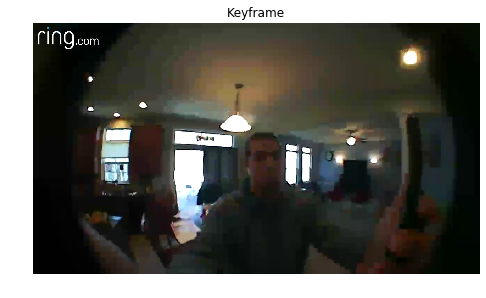

In [8]:
mpl.rcParams['figure.figsize'] = [8.0, 6.0]

keyframe10 = getKeyframe(path, 10)
displayFrame(keyframe10)

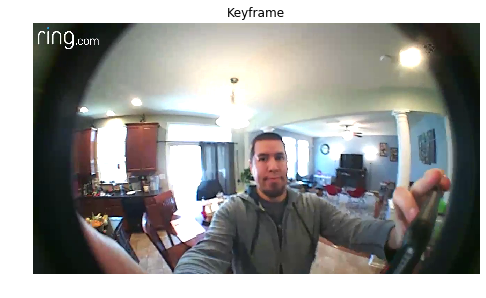

In [9]:
keyframe85 = getKeyframe(path, 85)
displayFrame(keyframe85)

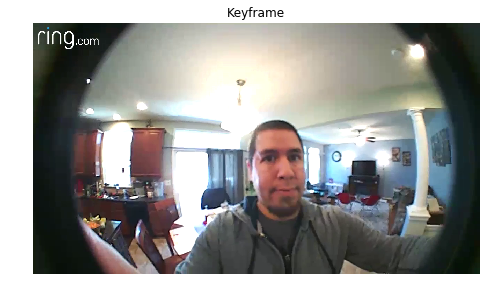

In [10]:
keyframe155 = getKeyframe(path, 155)
displayFrame(keyframe155)

## Experimentation with Pre-Processing

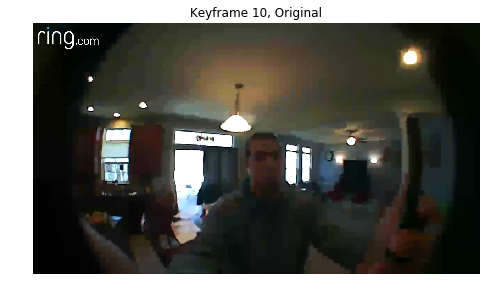

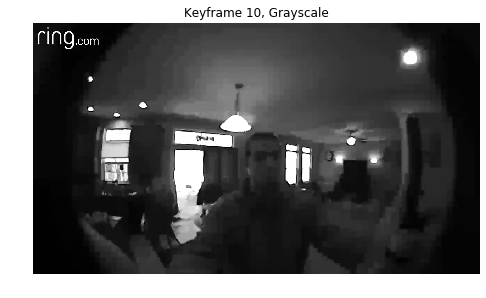

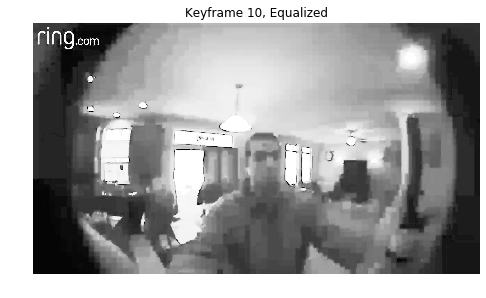

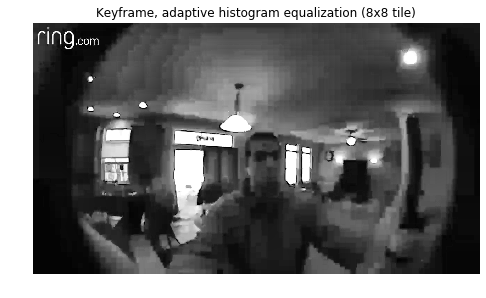

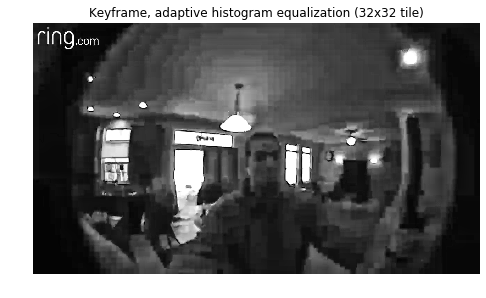

In [11]:
checkFrame = keyframe10

displayFrame(checkFrame, "Keyframe 10, Original")

displayFrame(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY), "Keyframe 10, Grayscale")

displayFrame(cv2.equalizeHist((cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))), "Keyframe 10, Equalized")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))
displayFrame(cl1, "Keyframe, adaptive histogram equalization (8x8 tile)")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
cl1 = clahe.apply(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))
displayFrame(cl1, "Keyframe, adaptive histogram equalization (32x32 tile)")

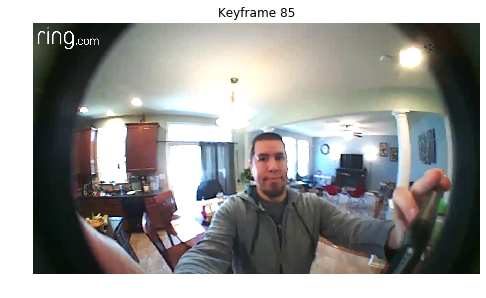

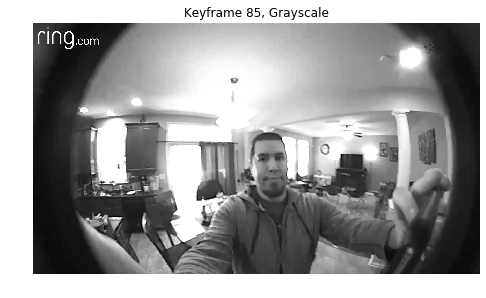

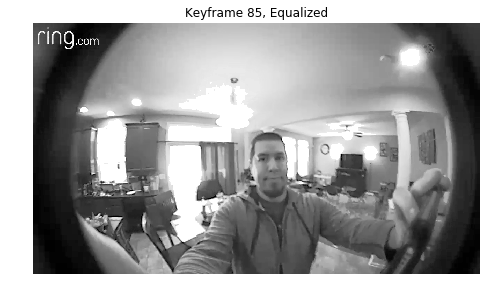

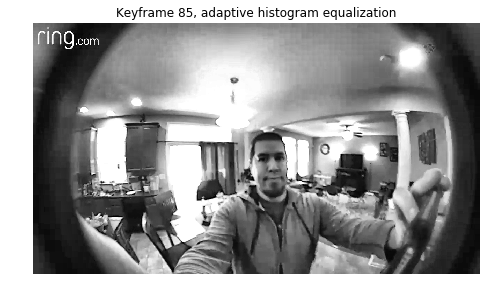

In [12]:
checkFrame = keyframe85
num = 85

displayFrame(checkFrame, "Keyframe %d" % (num))

displayFrame(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY), "Keyframe %d, Grayscale" % (num))

displayFrame(cv2.equalizeHist((cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))), "Keyframe %d, Equalized" % (num))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))
displayFrame(cl1, "Keyframe %d, adaptive histogram equalization" % (num))

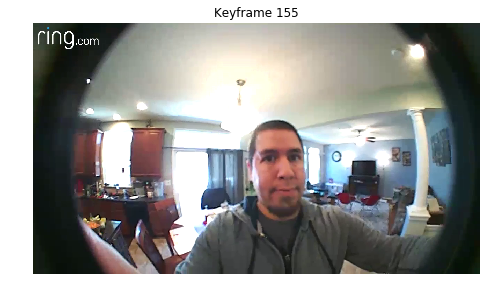

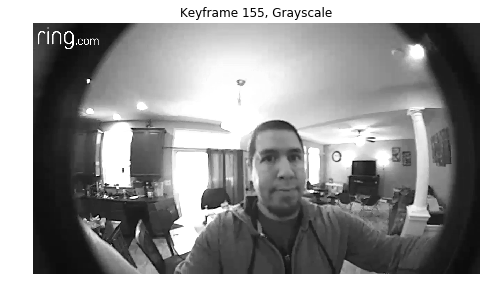

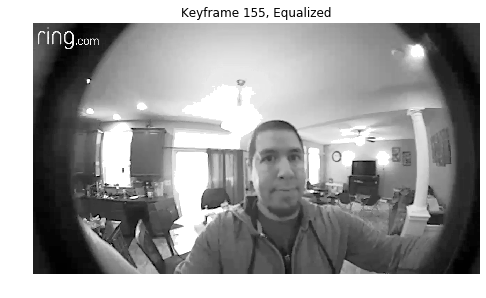

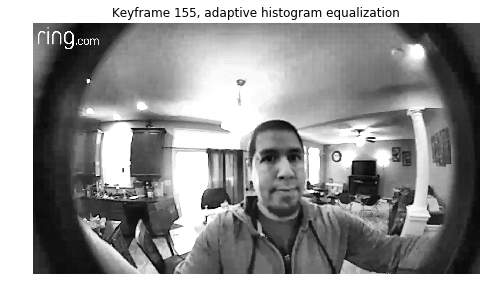

In [13]:
checkFrame = keyframe155
num = 155

displayFrame(checkFrame, "Keyframe %d" % (num))

displayFrame(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY), "Keyframe %d, Grayscale" % (num))

displayFrame(cv2.equalizeHist((cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))), "Keyframe %d, Equalized" % (num))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(cv2.cvtColor(checkFrame,cv2.COLOR_BGR2GRAY))
displayFrame(cl1, "Keyframe %d, adaptive histogram equalization" % (num))

## Detecting Faces in Keyframes

In [14]:
face_cascade = cv2.CascadeClassifier('cascade/haarcascade_frontalface_default.xml')
profile_cascade = cv2.CascadeClassifier('cascade/haarcascade_profileface.xml')

In [15]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

def detectFaces(frame,show=True):
    checkFrame = clahe.apply(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))  

    faceBoxes = []
    
    frontalFaces = face_cascade.detectMultiScale(checkFrame, 1.3, 5)
    #sideFaces = profile_cascade.detectMultiScale(checkFrame, 1.3, 5)
    
    allFaces = frontalFaces

    #if(not any(frontalFaces)):
    #    allFaces = sideFaces
    
    #if(any(sideFaces)):
    #    allFaces = allFaces + sideFaces
    
    for (x,y,w,h) in allFaces:
            faceBox = frame[y:y+h, x:x+w]                  
            faceBoxes.append((x,y,w,h))
            
            if(show):
                displayFrame(faceBox, "Face")     
                
    if(not any(allFaces)):     
        print("No faces detected")
                
    return faceBoxes

In [16]:
detectFaces(keyframe10)

No faces detected


[]

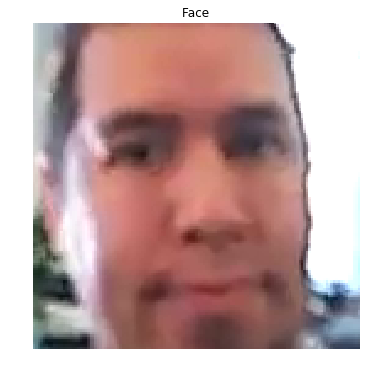

In [17]:
_ = detectFaces(keyframe85)

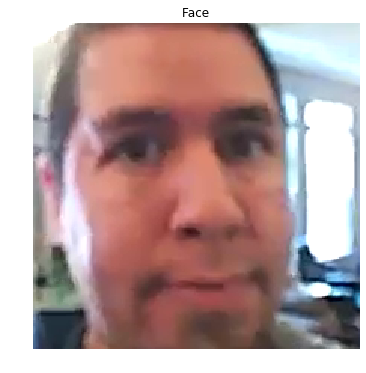

In [18]:
_ = detectFaces(keyframe155)

# Segmenting Face

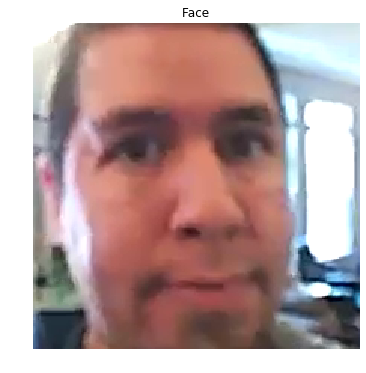

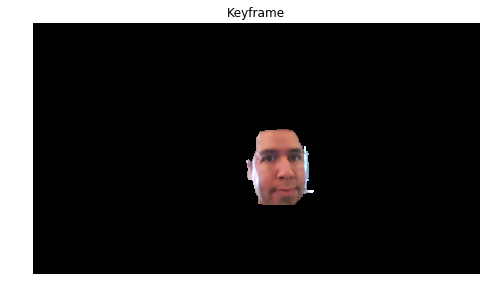

In [19]:
for faceBox in detectFaces(keyframe155):
    mask = np.zeros(keyframe155.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = faceBox
    cv2.grabCut(keyframe155,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = keyframe155*mask2[:,:,np.newaxis]
    displayFrame(img)

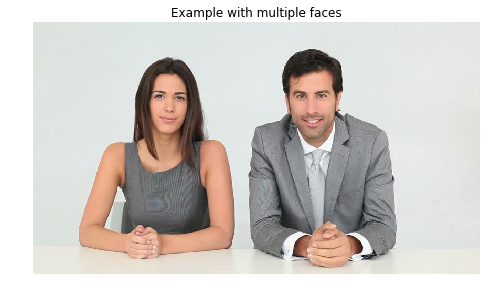

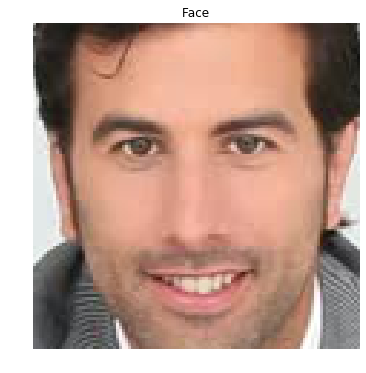

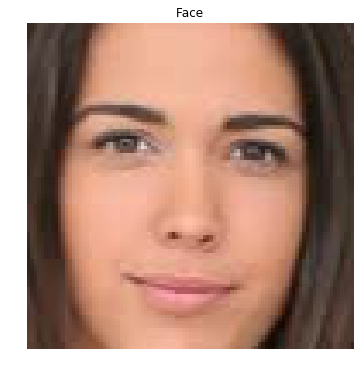

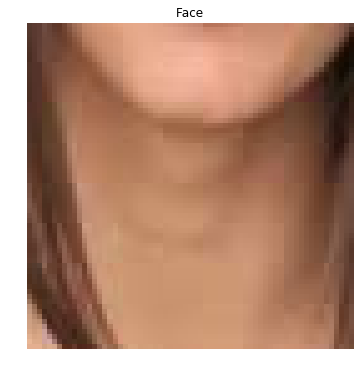

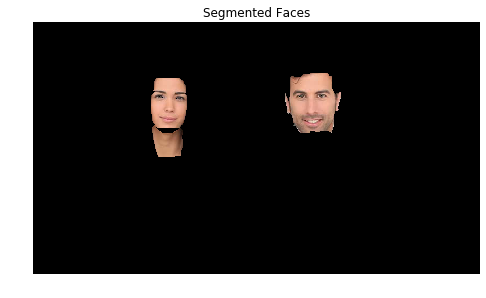

In [20]:
frame = cv2.imread("two-people.jpg")
displayFrame(frame, "Example with multiple faces")

final_img = []

for faceBox in detectFaces(frame):
    mask = np.zeros(frame.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = faceBox
    cv2.grabCut(frame,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    if(not any(final_img)):
        final_img = frame*mask2[:,:,np.newaxis]
    else:
        final_img = final_img + frame*mask2[:,:,np.newaxis]

displayFrame(final_img, "Segmented Faces")

## Creating 4 Panel Displays

1. Original
2. Preprocessed
3. Bounding box over detected faces
4. Segmented faces

In [21]:
def display4Panel(frame, show=True):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    preprocessed = clahe.apply(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    preprocessed = cv2.cvtColor(preprocessed, cv2.COLOR_GRAY2BGR)

    frameWithBox = copy(frame)
    faceBoxes = detectFaces(frame, show=False)
    for (x,y,w,h) in faceBoxes:
        frameWithBox = cv2.rectangle(frameWithBox,(x,y),(x+w,y+h),(255,0,0),10)

    segmentedFaces = []

    for faceBox in faceBoxes:
        mask = np.zeros(frame.shape[:2],np.uint8)
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)
        rect = faceBox
        cv2.grabCut(frame,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        if(not any(segmentedFaces)):
            segmentedFaces = frame*mask2[:,:,np.newaxis]
        else:
            segmentedFaces = segmentedFaces + frame*mask2[:,:,np.newaxis]

    if(not any(segmentedFaces)):
        frameWithBox = frame
        mask = cv2.cvtColor(np.zeros(frame.shape[:2],np.uint8), cv2.COLOR_GRAY2BGR)    
        segmentedFaces = mask

    row1 = np.hstack((frame, preprocessed))
    row2 = np.hstack((frameWithBox, segmentedFaces))
    final_frame = np.vstack((row1, row2))

    if(show):
        displayFrame(final_frame)
        
    return final_frame

No faces detected


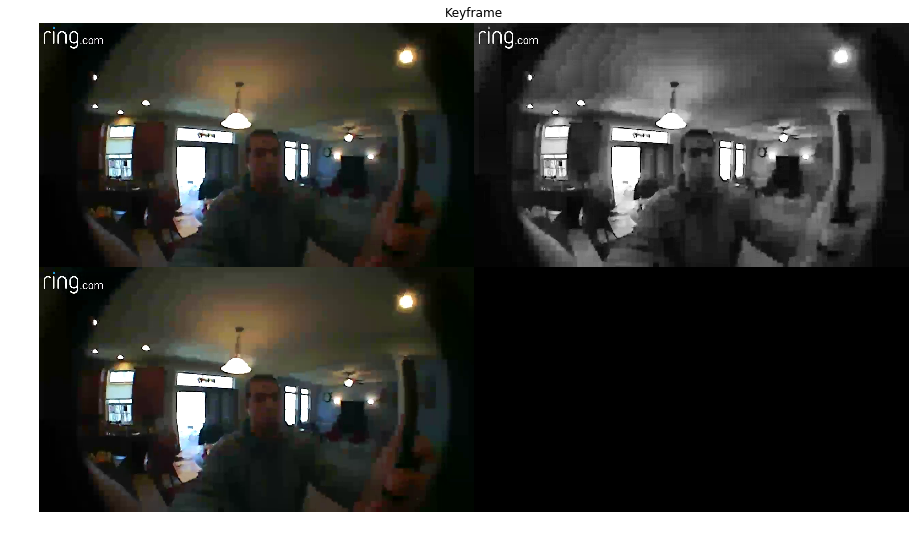

In [22]:
mpl.rcParams['figure.figsize'] = [16.0, 9.0]

_ = display4Panel(keyframe10)

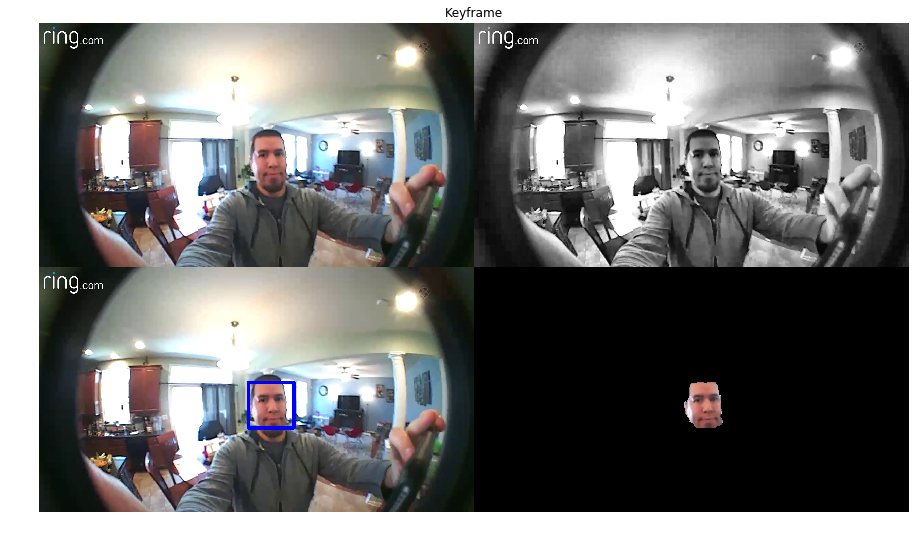

In [23]:
_ = display4Panel(keyframe85)

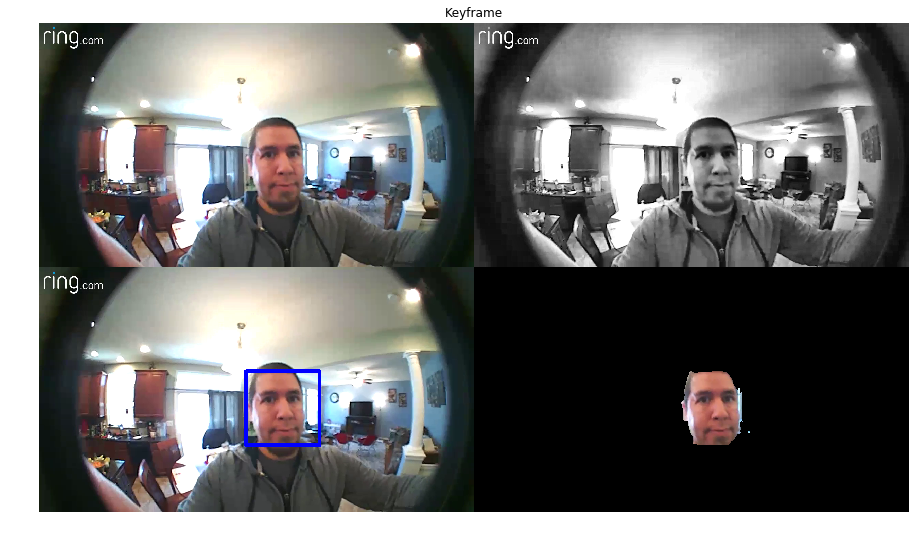

In [24]:
_ = display4Panel(keyframe155)

## Creating Output Video

In [25]:
def createVideoFrames(path):
    
    createKeyframes(path)
    
    vid = cv2.VideoCapture(path)
    numberFrames = int(vid.get(int(cv2.CAP_PROP_FRAME_COUNT)))

    outputPath = "output-videos/" + path.split('/')[1].split('.')[0] + "_output.mp4"

    for i in range(numberFrames):
        clear_output(wait=False)
        print("Frame %d" % (i))
        frame = getKeyframe(path, i)

        panelOfFour = display4Panel(frame, show=False)
        panelOfFour = cv2.resize(panelOfFour, (0,0), fx=0.5, fy=0.5)

        cv2.imwrite("final-frames/" + path.split("/")[1].split(".")[0] + "_" + str(i).zfill(5) + ".png", panelOfFour);


    clear_output(wait=False)
    print("Finished processing image sequence, output video at %s" % (outputPath))

In [26]:
createVideoFrames("ring-videos/inside-test.mp4")

Finished processing image sequence, output video at output-videos/inside-test_output.mp4


## Writing Images Sequences to Video with ffmpeg

In [28]:
! ffmpeg -i final-frames/inside-test_%05d.png -framerate 15 -y output-videos/inside-test.mp4

ffmpeg version 4.0 Copyright (c) 2000-2018 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/Users/anthony/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-shared --enable-static --enable-zlib --enable-pic --enable-gpl --enable-version3 --disable-nonfree --enable-hardcoded-tables --enable-avresample --enable-libfreetype --disable-openssl --disable-gnutls --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --disable-libx264
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    58.  3.100 / 58.  3.100
  libavfilter     7. 16.100 /  7. 16.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  1.100 /  5.  1.100
  libswresample   3.  1.100 /  3.  1.100
  libpostproc    55.  1.100 / 55.  1.100
Input #0, image2, from 'final-frames/inside-test_%05d.png':
  Duration: 00:00:08.40, start: 0.000000, bitrate

# Output Videos

### Inside, Straight on, Optimal Lighting

In [29]:
HTML(data='''<iframe width="560" height="315" src="https://www.youtube.com/embed/vsYzCad0C6A?rel=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>''')


/Users/anthony/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
